資料初探
- 資料維度
- 資料屬性與型別
- 數值/類別資料統計
- 遺漏值/空值

進階探索
- 資料數量分布
- 連續資料統計分布
- 分群彙總分析
- 資料關聯分析
- 資料篩選
- 資料轉換
    - 數值精度
    - 日期時間轉換
- 建立新屬性欄位

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("E:/teaching/classMaterial/dataEngineering/data/archive/archive.csv")

In [4]:
#瞭解資料內容
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [5]:
#total number of df
len(df)

969

In [6]:
#column names
df.columns

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country'],
      dtype='object')

In [7]:
#check numerical data statistics
df.describe()
#年度及Laureate ID(得獎者編號)的統計值並無意義

,Year,Laureate ID
count,969.000000,969.000000
mean,1970.287926,470.152735
std,32.937498,274.586623
min,1901.000000,1.000000
25%,1947.000000,230.000000
50%,1976.000000,462.000000
75%,1999.000000,718.000000
max,2016.000000,937.000000


In [24]:
df.describe(include=object)

,Category,Prize,Motivation,Prize Share,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
count,969,969,881,969,969,969,940,941,943,943,722,716,716,617,599,605
unique,6,579,565,4,2,904,868,601,121,2,315,186,29,582,291,50
top,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of the accelerating expansi...",1/1,Individual,Jack W. Szostak,1881-03-23,"New York, NY",United States of America,Male,University of California,"Cambridge, MA",United States of America,1985-09-08,Paris,United States of America
freq,227,5,5,351,939,3,3,48,276,893,34,48,363,3,28,210


In [8]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [9]:
df[2:6]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [10]:
df['Category']

0       Chemistry
1      Literature
2        Medicine
3           Peace
4           Peace
          ...    
964      Medicine
965         Peace
966       Physics
967       Physics
968       Physics
Name: Category, Length: 969, dtype: object

In [11]:
df[8:12][['Category','Sex']]

,Category,Sex
8,Medicine,Male
9,Peace,Male
10,Peace,Male
11,Physics,Male


In [12]:
df.iat[3,4]

'1/2'

In [13]:
df.at[2, 'Laureate ID']

293

In [14]:
df1 = df[df['Birth Country']=='Switzerland']
df1.tail()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
600,1987,Physics,The Nobel Prize in Physics 1987,"""for their important break-through in the disc...",1/2,131,Individual,K. Alexander Müller,1927-04-20,Basel,Switzerland,Male,IBM Zurich Research Laboratory,Rüschlikon,Switzerland,NaN,NaN,NaN
635,1991,Chemistry,The Nobel Prize in Chemistry 1991,"""for his contributions to the development of t...",1/1,276,Individual,Richard R. Ernst,1933-08-14,Winterthur,Switzerland,Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,NaN,NaN,NaN
692,1996,Medicine,The Nobel Prize in Physiology or Medicine 1996,"""for their discoveries concerning the specific...",1/2,456,Individual,Rolf M. Zinkernagel,1944-01-06,Basel,Switzerland,Male,"University of Zurich, Institute of Experimenta...",Zurich,Switzerland,NaN,NaN,NaN
761,2002,Chemistry,The Nobel Prize in Chemistry 2002,"""for his development of nuclear magnetic reson...",1/2,758,Individual,Kurt Wüthrich,1938-10-04,Aarberg,Switzerland,Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,NaN,NaN,NaN
762,2002,Chemistry,The Nobel Prize in Chemistry 2002,"""for his development of nuclear magnetic reson...",1/2,758,Individual,Kurt Wüthrich,1938-10-04,Aarberg,Switzerland,Male,The Scripps Research Institute,"La Jolla, CA",United States of America,NaN,NaN,NaN


In [15]:
df2 = df[df['Category'].isin(['Peace','Medicint', 'Economics'])]
df2.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom


In [16]:
df['Year'].min()

1901

In [17]:
df['Year'].max()

2016

In [18]:
df.sort_values(by=['Category'])

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
224,1945,Chemistry,The Nobel Prize in Chemistry 1945,"""for his research and inventions in agricultur...",1/1,203,Individual,Artturi Ilmari Virtanen,1895-01-15,Helsinki,Russian Empire (Finland),Male,University of Helsinki,Helsinki,Finland,1973-11-11,Helsinki,Finland
760,2002,Chemistry,The Nobel Prize in Chemistry 2002,"""for their development of soft desorption ioni...",1/4,757,Individual,Koichi Tanaka,1959-08-03,Toyama City,Japan,Male,Shimadzu Corp.,Kyoto,Japan,NaN,NaN,NaN
759,2002,Chemistry,The Nobel Prize in Chemistry 2002,"""for their development of soft desorption ioni...",1/4,756,Individual,John B. Fenn,1917-06-15,"New York, NY",United States of America,Male,Virginia Commonwealth University,"Richmond, VA",United States of America,2010-12-10,"Richmond, VA",United States of America
231,1946,Chemistry,The Nobel Prize in Chemistry 1946,"""for his discovery that enzymes can be crystal...",1/2,204,Individual,James Batcheller Sumner,1887-11-19,"Canton, MA",United States of America,Male,Cornell University,"Ithaca, NY",United States of America,1955-08-12,"Buffalo, NY",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1996,Physics,The Nobel Prize in Physics 1996,"""for their discovery of superfluidity in heliu...",1/3,151,Individual,Robert C. Richardson,1937-06-26,"Washington, DC",United States of America,Male,Cornell University,"Ithaca, NY",United States of America,2013-02-19,"Ithaca, NY",United States of America
696,1996,Physics,The Nobel Prize in Physics 1996,"""for their discovery of superfluidity in heliu...",1/3,150,Individual,Douglas D. Osheroff,1945-08-01,"Aberdeen, WA",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN
695,1996,Physics,The Nobel Prize in Physics 1996,"""for their discovery of superfluidity in heliu...",1/3,149,Individual,David M. Lee,1931-01-20,"Rye, NY",United States of America,Male,Cornell University,"Ithaca, NY",United States of America,NaN,NaN,NaN
296,1954,Physics,The Nobel Prize in Physics 1954,"""for his fundamental research in quantum mecha...",1/2,61,Individual,Max Born,1882-12-11,Breslau (Wroclaw),Germany (Poland),Male,Edinburgh University,Edinburgh,United Kingdom,1970-01-05,Göttingen,West Germany (Germany)


In [19]:
df.describe(include=object)

,Category,Prize,Motivation,Prize Share,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
count,969,969,881,969,969,969,940,941,943,943,722,716,716,617,599,605
unique,6,579,565,4,2,904,868,601,121,2,315,186,29,582,291,50
top,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of the accelerating expansi...",1/1,Individual,Jack W. Szostak,1881-03-23,"New York, NY",United States of America,Male,University of California,"Cambridge, MA",United States of America,1985-09-08,Paris,United States of America
freq,227,5,5,351,939,3,3,48,276,893,34,48,363,3,28,210


In [20]:
df['Category'].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [21]:
df['Category'].nunique()

6

In [22]:
df['Category'].value_counts()

Category
Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: count, dtype: int64

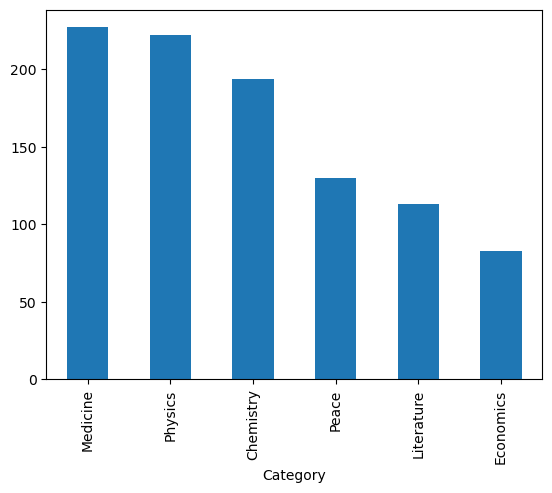

In [23]:
import matplotlib.pyplot as plt
df['Category'].value_counts().plot(kind='bar')
plt.show()

In [31]:
plt.show()